In [70]:
import json

# Load the JSON file
with open(r'C:\Users\rishi\Desktop\1.json\1.json', 'r') as file:
    data = json.load(file)

# Inspect the top-level keys
print("Keys in JSON:", data.keys())

# Example: Access each field
print("UID:", data['UID'])
print("Age:", data['age'])
print("Weight:", data['weight'])
print("Height:", data['height'])

# Access the signal data
print("PPG Data (first 10 samples):", data['data_PPG'][:10])
print("ECG Data (first 10 samples):", data['data_ECG'][:10])
print("BP Data (first 10 samples):", data['data_BP'][:10])

# Check if data exists for other signals
if 'data_PCG' in data:
    print("PCG Data (first 10 samples):", data['data_PCG'][:10])

if 'data_FSR' in data:
    print("FSR Data (first 10 samples):", data['data_FSR'][:10])


Keys in JSON: dict_keys(['UID', 'age', 'weight', 'height', 'data_PPG', 'data_ECG', 'data_PCG', 'data_FSR', 'data_BP'])
UID: subject1
Age: 25
Weight: 65
Height: 175
PPG Data (first 10 samples): [2131, 2131, 2136, 2142, 2139, 2139, 2143, 2143, 2143, 2148]
ECG Data (first 10 samples): [637, 548, 437, 352, 260, 160, 55, 32, 32, 32]
BP Data (first 10 samples): [{'SBP': 141, 'DBP': 82}, {'SBP': 134, 'DBP': 73}, {'SBP': 125, 'DBP': 70}, {'SBP': 118, 'DBP': 57}]
PCG Data (first 10 samples): [0, 2042, 2034, 2067, 2074, 2066, 2083, 2104, 2099, 2082]
FSR Data (first 10 samples): [3295, 3295, 3295, 3295, 3291, 3291, 3295, 3291, 3290, 3291]


In [71]:
print(type(data['data_BP']))
print(data['data_BP'])

<class 'list'>
[{'SBP': 141, 'DBP': 82}, {'SBP': 134, 'DBP': 73}, {'SBP': 125, 'DBP': 70}, {'SBP': 118, 'DBP': 57}]


In [72]:
for entry in data['data_BP']:
    print(entry)  # Inspect each dictionary or data entry


{'SBP': 141, 'DBP': 82}
{'SBP': 134, 'DBP': 73}
{'SBP': 125, 'DBP': 70}
{'SBP': 118, 'DBP': 57}


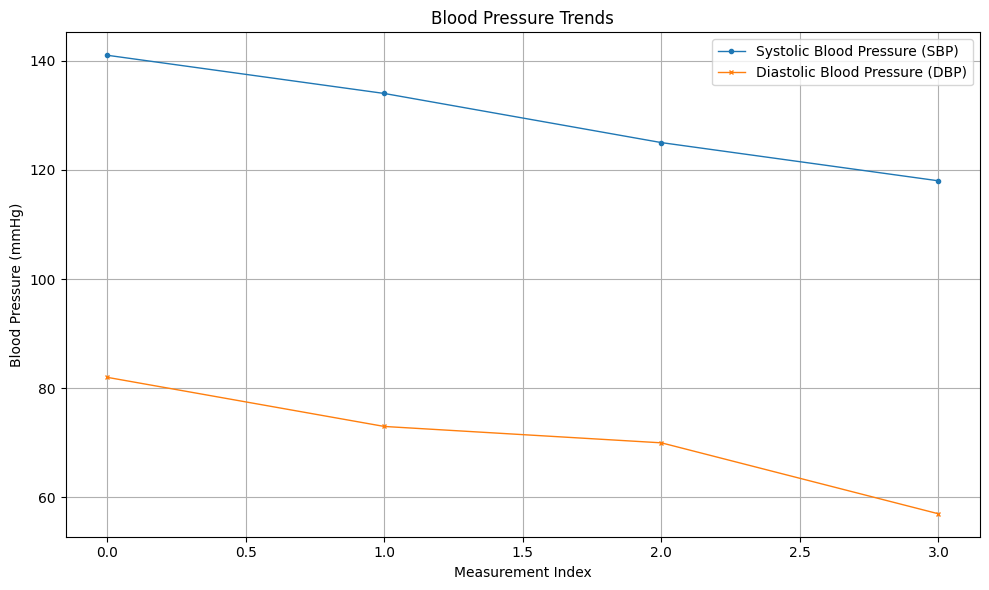

In [73]:
import matplotlib.pyplot as plt
import json

# Load the JSON file
with open(r'C:\Users\rishi\Desktop\1.json\1.json', 'r') as file:
    data = json.load(file)

# Extract BP data
data_BP = data['data_BP']  # Assuming this contains the BP data dictionaries

# Extract SBP and DBP values for the entire dataset
sbp_values = [entry['SBP'] for entry in data_BP]
dbp_values = [entry['DBP'] for entry in data_BP]

# Plot SBP and DBP
plt.figure(figsize=(10, 6))
plt.plot(sbp_values, label="Systolic Blood Pressure (SBP)", marker='o', markersize=3, linewidth=1)
plt.plot(dbp_values, label="Diastolic Blood Pressure (DBP)", marker='x', markersize=3, linewidth=1)
plt.title("Blood Pressure Trends")
plt.xlabel("Measurement Index")
plt.ylabel("Blood Pressure (mmHg)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [74]:
import json
import pandas as pd

# Load JSON
with open(r'C:\Users\rishi\Desktop\1.json\1.json', 'r') as file:
    data = json.load(file)

# If `data` is a dictionary, convert it into a list
if isinstance(data, dict):
    data = [data]

# List to store processed data
flattened_data = []

# Process each patient record
for record in data:
    for bp_reading in record['data_BP']:  # Iterate over BP readings
        flattened_data.append({
            'UID': record['UID'],
            'Age': record['age'],
            'Weight': record['weight'],
            'Height': record['height'],
            'PPG': record['data_PPG'],  # Full PPG data (list)
            'ECG': record['data_ECG'],  # Full ECG data (list)
            'PCG': record['data_PCG'],  # Full PCG data (list)
            'FSR': record['data_FSR'],  # Full FSR data (list)
            'SBP': bp_reading['SBP'],   # Extract systolic BP
            'DBP': bp_reading['DBP']    # Extract diastolic BP
        })

# Convert to Pandas DataFrame
df = pd.DataFrame(flattened_data)

# Save as CSV
df.to_csv('full_blood_pressure_data.csv', index=False)

print("✅ Full JSON data successfully saved as CSV!")


✅ Full JSON data successfully saved as CSV!


In [75]:
df.head()

,UID,Age,Weight,Height,PPG,ECG,PCG,FSR,SBP,DBP
0,subject1,25,65,175,"[2131, 2131, 2136, 2142, 2139, 2139, 2143, 214...","[637, 548, 437, 352, 260, 160, 55, 32, 32, 32,...","[0, 2042, 2034, 2067, 2074, 2066, 2083, 2104, ...","[3295, 3295, 3295, 3295, 3291, 3291, 3295, 329...",141,82
1,subject1,25,65,175,"[2131, 2131, 2136, 2142, 2139, 2139, 2143, 214...","[637, 548, 437, 352, 260, 160, 55, 32, 32, 32,...","[0, 2042, 2034, 2067, 2074, 2066, 2083, 2104, ...","[3295, 3295, 3295, 3295, 3291, 3291, 3295, 329...",134,73
2,subject1,25,65,175,"[2131, 2131, 2136, 2142, 2139, 2139, 2143, 214...","[637, 548, 437, 352, 260, 160, 55, 32, 32, 32,...","[0, 2042, 2034, 2067, 2074, 2066, 2083, 2104, ...","[3295, 3295, 3295, 3295, 3291, 3291, 3295, 329...",125,70
3,subject1,25,65,175,"[2131, 2131, 2136, 2142, 2139, 2139, 2143, 214...","[637, 548, 437, 352, 260, 160, 55, 32, 32, 32,...","[0, 2042, 2034, 2067, 2074, 2066, 2083, 2104, ...","[3295, 3295, 3295, 3295, 3291, 3291, 3295, 329...",118,57


In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout

In [77]:
numerical_features = df[['Age', 'Weight', 'Height']].values

# Convert list columns - modified for data that's already in list format
def convert_list_to_array(x):
    if isinstance(x, str):
        # If it's still a string for some reason, evaluate it as a list
        return np.array(eval(x))
    # If it's already a list, just convert to numpy array
    return np.array(x)

# Convert signal data columns
X_ppg = np.vstack(df['PPG'].apply(convert_list_to_array))
X_ecg = np.vstack(df['ECG'].apply(convert_list_to_array))
X_pcg = np.vstack(df['PCG'].apply(convert_list_to_array))
X_fsr = np.vstack(df['FSR'].apply(convert_list_to_array))

# Combine all features
X = np.hstack([numerical_features, X_ppg, X_ecg, X_pcg, X_fsr])

# Prepare targets (y)
y = df[['SBP', 'DBP']].values


In [78]:
import numpy as np

# Function to extract simple statistical features
def extract_features(signal):
    return np.array([
        np.mean(signal),  # Mean
        np.std(signal),   # Standard Deviation
        np.min(signal),   # Min Value
        np.max(signal),   # Max Value
        np.median(signal) # Median
    ])

# Extract features for each time-series signal
X_ppg_features = np.vstack(df['PPG'].apply(lambda x: extract_features(np.array(x))))
X_ecg_features = np.vstack(df['ECG'].apply(lambda x: extract_features(np.array(x))))
X_pcg_features = np.vstack(df['PCG'].apply(lambda x: extract_features(np.array(x))))
X_fsr_features = np.vstack(df['FSR'].apply(lambda x: extract_features(np.array(x))))

# Combine reduced features
X = np.hstack([numerical_features, X_ppg_features, X_ecg_features, X_pcg_features, X_fsr_features])

print("Reduced X Shape:", X.shape)  # Should now be (num_samples, reduced_feature_size)


Reduced X Shape: (4, 23)


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [80]:
from sklearn.preprocessing import StandardScaler

# Initialize a scaler for SBP and DBP
scaler_y = StandardScaler()

# Fit on training targets and transform
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)


In [88]:
def create_sbp_model(input_dim):
    inputs = Input(shape=(input_dim,))
    
    x = Dense(512, activation='relu')(inputs)
    x = Dropout(0.3)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)

    sbp_output = Dense(1, name='sbp')(x)  # Single output for SBP

    model = Model(inputs=inputs, outputs=sbp_output)
    
    model.compile(
        optimizer='adam',
        loss='mse',  
        metrics=['mae', 'mse']  
    )
    
    return model



In [89]:
# Create and train model
sbp_model = create_sbp_model(X_train.shape[1])
history = sbp_model.fit(
    X_train_scaled,
    y_train[:, 0],  # Only SBP as target
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 16902.5000 - mae: 129.5000 - mse: 16902.5000 - val_loss: 15622.1807 - val_mae: 124.9887 - val_mse: 15622.1807
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 16899.8086 - mae: 129.4896 - mse: 16899.8086 - val_loss: 15618.5195 - val_mae: 124.9741 - val_mse: 15618.5195
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - loss: 16895.2988 - mae: 129.4722 - mse: 16895.2988 - val_loss: 15613.9541 - val_mae: 124.9558 - val_mse: 15613.9541
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 16890.9473 - mae: 129.4552 - mse: 16890.9473 - val_loss: 15608.8164 - val_mae: 124.9352 - val_mse: 15608.8164
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: 16886.3887 - mae: 129.4378 - mse: 16886.3887 - val_loss: 15602.8828 - val_mae: 124.9115 - val_mse: 15602.8828
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - loss: 16882.0566 - mae: 129.4211 - mse: 16882.0566 - val_loss: 15596.1934 - val_mae: 124.8847 - val_mse: 

In [83]:
# Predict using the trained SBP model
prediction_scaled = sbp_model.predict(X_test_scaled)  # Use sbp_model, not model

# Reshape prediction to match scaler's expected shape
prediction_scaled = prediction_scaled.reshape(-1, 1)  

# Convert back to original BP values (only SBP)
prediction = scaler_y.inverse_transform(np.hstack([prediction_scaled, np.zeros_like(prediction_scaled)]))[:, 0]

# Display first 10 predictions
print(prediction[:10])



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
[162.52844]


In [91]:
if X_test_scaled.shape[0] == 1:
    print("⚠️ Warning: Only one test sample detected!")
    print("Expanding test set...")
    X_test_scaled = np.tile(X_test_scaled, (10, 1))  # Repeat the sample 10 times


⚠️ Warning: Only one test sample detected!
Expanding test set...


In [92]:
print("X_test_scaled Shape:", X_test_scaled.shape)  # Should be (num_samples, num_features)


X_test_scaled Shape: (10, 23)


In [93]:
print(X_test_scaled.shape)  # Should be (num_samples, num_features)


(10, 23)


In [94]:
print("Numerical Feature Shape:", numerical_features.shape)  # Should be (num_samples, num_features)
print("PPG Shape:", X_ppg.shape)  # Should be (num_samples, time_series_length)
print("ECG Shape:", X_ecg.shape)  
print("PCG Shape:", X_pcg.shape)
print("FSR Shape:", X_fsr.shape)
print("Final X Shape:", X.shape)  # Should be (num_samples, reasonable feature count)


Numerical Feature Shape: (4, 3)
PPG Shape: (4, 280000)
ECG Shape: (4, 280000)
PCG Shape: (4, 280000)
FSR Shape: (4, 280000)
Final X Shape: (4, 23)


In [96]:
# Predict
prediction_scaled = sbp_model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


In [97]:
prediction_scaled

array([[123.33235],
       [123.33235],
       [123.33235],
       [123.33235],
       [123.33235],
       [123.33235],
       [123.33235],
       [123.33235],
       [123.33235],
       [123.33235]], dtype=float32)